# THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS

## PREDICTION USING SUPERVISED ML

# PREDICT PERCENTAGE OF STUDENT BASED ON NO. OF STUDY HOURS

## AUTHOR: HARSHIT JOSHI

## READING DATA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [5]:
url="https://bit.ly/w-data"
dataset=pd.read_csv(url)
print("data importing successfull")


data importing successfull


In [6]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### After reading the data we know that there are 25 rows and 2 columns 

## CHECKING MISSING VALUES

In [7]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

## GENERATING DESCRIPTIVE STATISTICS 

In [8]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## DATA VISUALIZATION

In [9]:
x=dataset['Hours']
y=dataset['Scores']


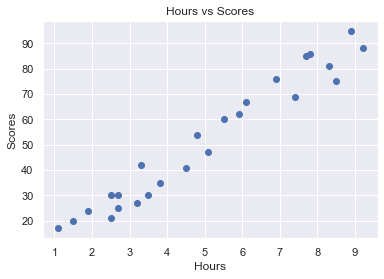

In [10]:
plt.scatter(x,y)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## LINEAR REGRESSION MODEL

### PREPARATION OF DATA

In [11]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
regression=LinearRegression()
regression.fit(x_train,y_train)
print("Training complete")

Training complete


In [14]:
x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        13:26:06   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PLOTTING REGRESSION LINE

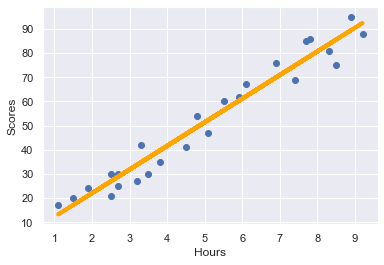

In [15]:
plt.scatter(x,y)
yhats=9.7758*x+2.4837
fig=plt.plot(x,yhats,lw=4,c='orange',label='regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### MAKING PREDICTION

In [16]:
print(x_test)
y_pred=regression.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [18]:
dataframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataframe

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### EVALUATION OF MODEL

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027652


## WHAT IS THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS/DAY ?

In [20]:
Hours=float(input("Enter the number of hours"))
Percentage=regression.predict([[Hours]])
print("Predicted Score:",Percentage)

Enter the number of hours9.25
Predicted Score: [92.91505723]
